In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def calculate_rho_w(T, concentration):
    rho_w = ((5.6+.27*T-1.5e-4*T**2)*concentration-((2.36+.099*T)/(1+.214*concentration))*concentration**(3/2.))**-1
    return rho_w

In [19]:
def calculate_porosity(rho_water, rho_measured, cementation):
    porosity = (rho_water/rho_measured)**(1/cementation)
    return porosity

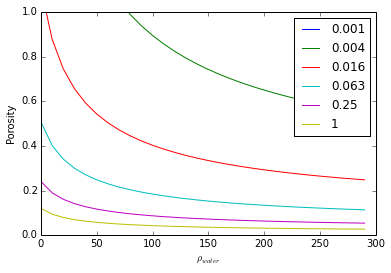

In [28]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r'$\rho_{water}$')
ax.set_ylabel('Porosity')
rho_m = 10.
m = 1.7
T = np.arange(0, 300, 10)

line_list = []
label_list = []
for c in np.logspace(-3, 0, num=6):
    rho_w = calculate_rho_w(T, c)
    porosity = calculate_porosity(rho_w, rho_m, m)
    l1, = ax.plot(T, porosity)
    line_list.append(l1)
    label_list.append('{0:.2g}'.format(c))
    
ax.legend(line_list, label_list)
ax.set_ylim(0, 1)
plt.show()

In [30]:
def modified_archies(sigma_measured, sigma_fluid, cementation, water_saturation):
    porosity = ((sigma_measured/sigma_fluid)*(1/water_saturation)**cementation)**(1./cementation)
    return porosity


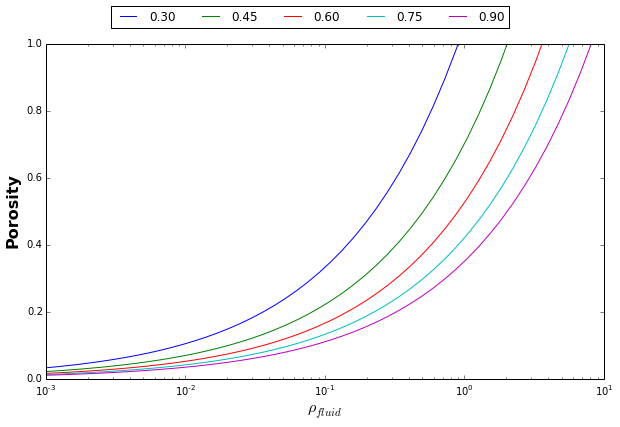

In [52]:
fig = plt.figure(2, [10, 6])
ax= fig.add_subplot(1,1,1)
ax.set_xlabel(r'$\rho_{fluid}$', fontdict={'size':16, 'weight':'bold'})
ax.set_ylabel('Porosity', fontdict={'size':16, 'weight':'bold'})

Sw = np.arange(.3, 1, .15)
sigma_w = np.logspace(-1, 3)
sigma_m = 1./10.0
m = 2

line_list = []
label_list = []
for sw in Sw:
    phi = modified_archies(sigma_m, sigma_w, m, sw)

    l1, = ax.semilogx(1./sigma_w, phi)
    line_list.append(l1)
    label_list.append('{0:.2f}'.format(sw))
    
fig.legend(line_list, label_list, loc='upper center', ncol=len(label_list))
ax.set_ylim(0, 1)
plt.show()


